# Table of Contents
1. [Fixing Date-Time Formats](#date-time-fix)
2. [Merging ATM Data with Weather Data](#merge)
3. [Finding out Correlated Columns in Weather Data](#correlated-columns)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime 

%matplotlib inline

<a name="date-time-fix"></a>
## There are two Date-Time formats in the ATM Data
<p> These are, d/m/yyyy and dd-mm-yyyy </p>

In [11]:
atm_data = pd.read_csv('../data/aggregated_atm_data.csv')
bs_data = atm_data[atm_data['ATM Name'] == 'Big Street ATM']
bs_data.head(20)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
5,Big Street ATM,2/1/2011,17,5,12,52800,20900,31900,Sunday,NH,H,HHW
10,Big Street ATM,3/1/2011,24,21,3,88100,77100,11000,Monday,NH,W,WWW
15,Big Street ATM,4/1/2011,34,12,22,101600,51200,50400,Tuesday,NH,W,WWW
20,Big Street ATM,5/1/2011,30,14,16,98000,52700,45300,Wednesday,NH,W,WWW
25,Big Street ATM,6/1/2011,29,16,13,85900,54400,31500,Thursday,NH,W,WWW
30,Big Street ATM,7/1/2011,23,13,10,76500,50600,25900,Friday,NH,W,WWW
35,Big Street ATM,8/1/2011,37,17,20,128600,54200,74400,Saturday,NH,H,WHH
40,Big Street ATM,9/1/2011,36,17,19,89000,37600,51400,Sunday,NH,H,HHW
45,Big Street ATM,10/1/2011,29,14,15,89800,60500,29300,Monday,NH,W,HWW


## Converting one of the formats into the other

<p> Converting formats of type d/m/yyyy into dd-mm-yyyy, so that we can finally convert it to a datetime column </p>

In [12]:
def dateformat_fixer(date):
    # If its part of the first format, convert it to the second one
    if '/' in date:
        date_parts = date.split('/')
        
        year = date_parts[2]
        month = date_parts[1]
        day = date_parts[0]
        
        if int(month) < 10:
            month = '0' + month
        if int(day) < 10:
            day = '0' + day
        
        return day + '-' + month + '-' + year
    # If its already in second format, keep it as it is
    else:
        return date

atm_data = pd.read_csv('../data/aggregated_atm_data.csv')
atm_data['Transaction Date'] = atm_data.apply(lambda row: dateformat_fixer(row['Transaction Date']), axis=1)

## Notice how all the datetimes are in one format now as compared to above output

In [80]:
bs_data = atm_data[atm_data['ATM Name'] == 'Big Street ATM']

bs_data.head(20)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,01-01-2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
5,Big Street ATM,02-01-2011,17,5,12,52800,20900,31900,Sunday,NH,H,HHW
10,Big Street ATM,03-01-2011,24,21,3,88100,77100,11000,Monday,NH,W,WWW
15,Big Street ATM,04-01-2011,34,12,22,101600,51200,50400,Tuesday,NH,W,WWW
20,Big Street ATM,05-01-2011,30,14,16,98000,52700,45300,Wednesday,NH,W,WWW
25,Big Street ATM,06-01-2011,29,16,13,85900,54400,31500,Thursday,NH,W,WWW
30,Big Street ATM,07-01-2011,23,13,10,76500,50600,25900,Friday,NH,W,WWW
35,Big Street ATM,08-01-2011,37,17,20,128600,54200,74400,Saturday,NH,H,WHH
40,Big Street ATM,09-01-2011,36,17,19,89000,37600,51400,Sunday,NH,H,HHW
45,Big Street ATM,10-01-2011,29,14,15,89800,60500,29300,Monday,NH,W,HWW


<b> Now we can convert Transaction Date to datetime column by providing the format as %d-%m-%Y </b>

In [81]:
atm_data['Transaction Date'] = pd.to_datetime(atm_data['Transaction Date'], format='%d-%m-%Y')

bs_data = atm_data[atm_data['ATM Name'] == 'Big Street ATM']

bs_data.head(40)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,Saturday,H,H,WHH
5,Big Street ATM,2011-01-02,17,5,12,52800,20900,31900,Sunday,NH,H,HHW
10,Big Street ATM,2011-01-03,24,21,3,88100,77100,11000,Monday,NH,W,WWW
15,Big Street ATM,2011-01-04,34,12,22,101600,51200,50400,Tuesday,NH,W,WWW
20,Big Street ATM,2011-01-05,30,14,16,98000,52700,45300,Wednesday,NH,W,WWW
25,Big Street ATM,2011-01-06,29,16,13,85900,54400,31500,Thursday,NH,W,WWW
30,Big Street ATM,2011-01-07,23,13,10,76500,50600,25900,Friday,NH,W,WWW
35,Big Street ATM,2011-01-08,37,17,20,128600,54200,74400,Saturday,NH,H,WHH
40,Big Street ATM,2011-01-09,36,17,19,89000,37600,51400,Sunday,NH,H,HHW
45,Big Street ATM,2011-01-10,29,14,15,89800,60500,29300,Monday,NH,W,HWW


<a name="merge"></a>
# Merging Weather with ATM Data

Columns and their meanings
<ul>
<li> UV Index = The amount of UV Radiation falling as an index, has values ranging from 0 (at night) to 11 or 12 at noon. </li>
<li> SunHour = Number of hours sunshine was available for the day </li>
<li> moonIllumination = Describes the phase of the moon by describing how much illumination it provides
(0 = No Moon, 100 = Full Moon) </li>
<li> Cloud Cover = I suppose this is also in % like moonIllumination </li>
<li> Humidity = Also a % </li>
<li> PrecipiMM = The amount of precipitation in mm (Basically RAINFALL COLUMN) </li>
<li> pressure = Atmospheric Pressure on Sea Level </li>
<li> visibility = It is a measure of the distance at which an object or light can be clearly discerned.
(Probably in kms) </li>
<li> Wind direction = It is typically reported in degrees, and describes the direction from which the wind emanates
(going to drop this for now) </li>
<li> Rest all columns are directly understood </li>
</ul>

In [13]:
weather_data = pd.read_csv('../data/mysore_weather.csv')
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], format='%Y-%m-%d')
weather_data.drop('totalSnow_cm', axis=1, inplace=True)

In [83]:
weather_data.head()

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2009-01-01,28,11,11.6,5,31,10:01 AM,10:07 PM,06:44 AM,06:09 PM,...,10,1,62,0.0,1013,28,9,87,6,mysore
1,2009-01-02,28,12,11.6,5,38,10:38 AM,10:55 PM,06:45 AM,06:10 PM,...,10,4,65,0.0,1014,28,9,81,6,mysore
2,2009-01-03,27,13,11.6,5,45,11:15 AM,11:44 PM,06:45 AM,06:11 PM,...,11,27,71,0.0,1014,27,9,94,7,mysore
3,2009-01-04,28,14,11.6,6,52,11:54 AM,No moonset,06:45 AM,06:11 PM,...,10,19,65,0.0,1014,28,9,93,6,mysore
4,2009-01-05,28,13,11.6,6,60,12:36 PM,12:34 AM,06:46 AM,06:12 PM,...,10,7,64,0.0,1012,28,9,106,6,mysore


In [84]:
atm_data['Weekday'] = atm_data['Weekday'].str.upper()

combined_data = pd.merge(atm_data, weather_data, how='inner', left_on='Transaction Date', right_on='date_time')
combined_data.drop(['date_time', 'location'], axis=1, inplace=True)

In [86]:
bs_data = combined_data[combined_data['ATM Name'] == 'Big Street ATM']

bs_data.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,SATURDAY,H,...,23,6,16,70,0.1,1009,29,9,128,3
5,Big Street ATM,2011-01-02,17,5,12,52800,20900,31900,SUNDAY,NH,...,23,7,18,69,0.0,1010,29,9,139,4
10,Big Street ATM,2011-01-03,24,21,3,88100,77100,11000,MONDAY,NH,...,22,13,39,74,0.1,1011,28,9,89,9
15,Big Street ATM,2011-01-04,34,12,22,101600,51200,50400,TUESDAY,NH,...,22,12,34,72,0.0,1011,28,9,85,8
20,Big Street ATM,2011-01-05,30,14,16,98000,52700,45300,WEDNESDAY,NH,...,21,9,60,82,1.0,1011,26,7,82,7


In [35]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11589 entries, 0 to 11588
Data columns (total 34 columns):
ATM Name                        11589 non-null object
Transaction Date                11589 non-null datetime64[ns]
No Of Withdrawals               11589 non-null int64
No Of XYZ Card Withdrawals      11589 non-null int64
No Of Other Card Withdrawals    11589 non-null int64
Total amount Withdrawn          11589 non-null int64
Amount withdrawn XYZ Card       11589 non-null int64
Amount withdrawn Other Card     11589 non-null int64
Weekday                         11589 non-null object
Festival Religion               11589 non-null object
Working Day                     11589 non-null object
Holiday Sequence                11589 non-null object
maxtempC                        11589 non-null int64
mintempC                        11589 non-null int64
sunHour                         11589 non-null float64
uvIndex                         11589 non-null int64
moon_illumination          

In [88]:
combined_data.to_csv('../data/aggregated_atm_data_with_weather_data.csv', index=False)

<a name="correlated-columns"></a>
# Finding out Correlated Columns in Weather Data

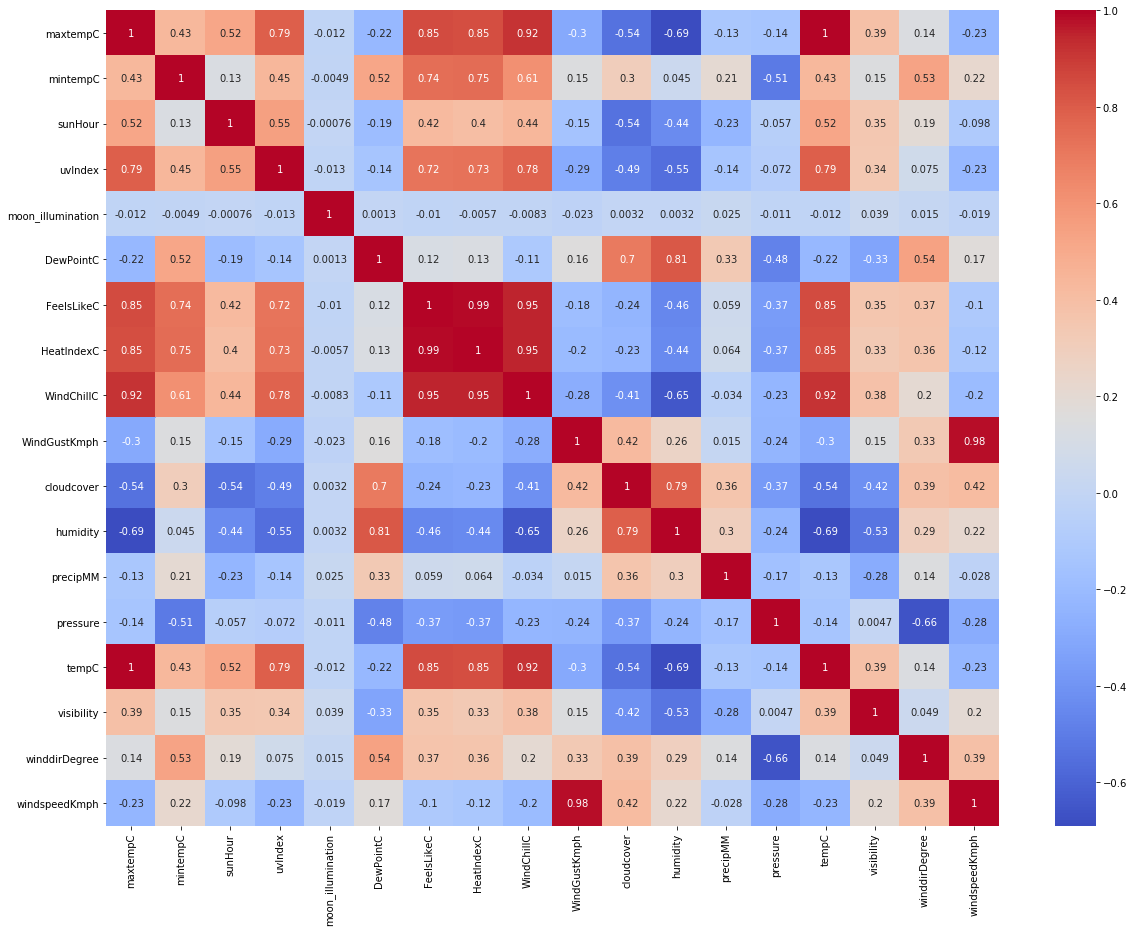

In [21]:
plt.figure(figsize=(20, 15))
sns.heatmap(weather_data.corr(), cmap='coolwarm', annot=True)

<p> Finds all columns that are correlated with other columns by atleast 0.8 (this value can be changed by adjusting the variable value) and stores it in a dictionary, such that each (key, value) pair has correlation > 0.8 </p>

In [22]:
max_correlation_allowed = 0.8
correlated_columns = {}
weather_data_corr_df = weather_data.corr()

# For each column check which row indices are highly correlated
for column in weather_data_corr_df.columns:
    # Note: name attribute for a row in apply() function returns index, but doesn't have much use elsewhere
    correlated_columns[column] = weather_data_corr_df[weather_data_corr_df.apply(lambda x: x[column] > max_correlation_allowed 
                                                    and column != x.name, axis=1)].index.tolist()
    

In [23]:
# Highly correlated columns,
correlated_columns

{'maxtempC': ['FeelsLikeC', 'HeatIndexC', 'WindChillC', 'tempC'],
 'mintempC': [],
 'sunHour': [],
 'uvIndex': [],
 'moon_illumination': [],
 'DewPointC': ['humidity'],
 'FeelsLikeC': ['maxtempC', 'HeatIndexC', 'WindChillC', 'tempC'],
 'HeatIndexC': ['maxtempC', 'FeelsLikeC', 'WindChillC', 'tempC'],
 'WindChillC': ['maxtempC', 'FeelsLikeC', 'HeatIndexC', 'tempC'],
 'WindGustKmph': ['windspeedKmph'],
 'cloudcover': [],
 'humidity': ['DewPointC'],
 'precipMM': [],
 'pressure': [],
 'tempC': ['maxtempC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC'],
 'visibility': [],
 'winddirDegree': [],
 'windspeedKmph': ['WindGustKmph']}